<a href="https://colab.research.google.com/github/FranMoritz/P-s_Venda/blob/main/Pos_Venda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Pós Venda**



---

A Indústria AtlasTech é uma fabricante nacional de eletrodomésticos de médio porte. Nos últimos anos, a empresa cresceu rápido: ampliou canais de venda, entrou forte no e-commerce e aumentou a produção para atender a demanda.

No papel, tudo parecia saudável.Mas havia um ruído constante no fundo da operação. Esse ruído vinha do pós-venda.
A diretoria tinha perguntas, mas não tinha respostas confiáveis:

O problema está no produto ou no atendimento?

Algumas linhas de produto geram mais dor de cabeça que outras?

Existe relação entre tempo de atendimento e avaliação negativa?

Reclamações estão impactando recompra e churn?

Estamos apagando incêndios onde não é o foco real?


# **Árvore Lógica**

Aqui são explicitadas as possíveis causas

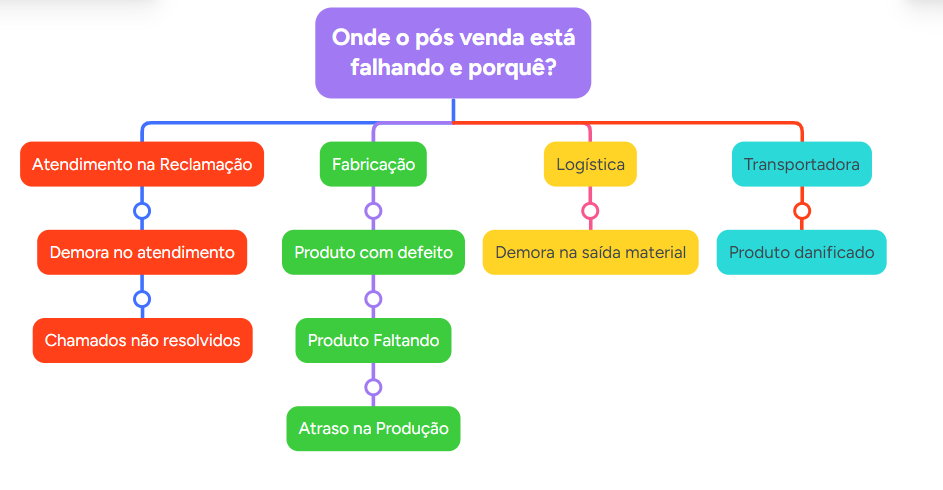

In [ ]:
#acessando o drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importando as libs usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#chamando o arquivo
df_posvenda = pd.read_csv("/content/gdrive/My Drive/Pos_Venda/dataset_pos_venda_atlastech.csv",
                            delimiter=',',
                            encoding= 'utf-8'#'latin1' 'utf-8' 'latin1'
                            )

In [ ]:
df_posvenda.shape

(3000, 15)

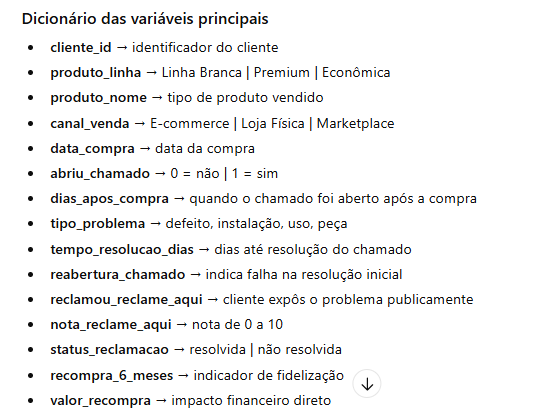

In [ ]:
df_posvenda.head()

,cliente_id,produto_linha,produto_nome,canal_venda,data_compra,abriu_chamado,dias_apos_compra,tipo_problema,tempo_resolucao_dias,reabertura_chamado,reclamou_reclame_aqui,nota_reclame_aqui,status_reclamacao,recompra_6_meses,valor_recompra
0,25795,Linha Branca,Geladeira Y,E-commerce,2024-08-11,1,78.0,Uso inadequado,23.0,0.0,0,NaN,Não aplicável,1,1104.27
1,10860,Linha Econômica,Geladeira Y,Loja Física,2024-06-23,1,95.0,Peça com falha,24.0,0.0,0,NaN,Não aplicável,0,0.00
2,86820,Linha Branca,Fogão Z,E-commerce,2024-03-30,1,109.0,Instalação,10.0,0.0,0,NaN,Não aplicável,0,0.00
3,64886,Linha Econômica,Geladeira Y,Loja Física,2024-08-28,0,NaN,NaN,NaN,NaN,0,NaN,Não aplicável,0,0.00
4,16265,Linha Premium,Geladeira Y,Marketplace,2024-02-04,1,52.0,Peça com falha,19.0,0.0,1,2.0,Resolvida,0,0.00


In [ ]:
# Visualização dos metadados
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe
metadata_df = generate_metadata(df_posvenda)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,cliente_id,int64,0,0.00,2945
1,abriu_chamado,int64,0,0.00,2
2,reclamou_reclame_aqui,int64,0,0.00,2
3,recompra_6_meses,int64,0,0.00,2
4,dias_apos_compra,float64,1620,54.00,179
5,tempo_resolucao_dias,float64,1620,54.00,44
6,reabertura_chamado,float64,1620,54.00,2
7,nota_reclame_aqui,float64,2609,86.97,11
8,valor_recompra,float64,0,0.00,1038
9,produto_linha,object,0,0.00,3


Em status_reclamacao foi aplicada a condição 'Não se Aplica', e em nota_reclame_aqui não foi alterado pois, nulo também é uma informação, neste caso mostra que mais de 80% dos clientes não abriram reclamação no Reclame Aqui.

In [ ]:
df_posvenda["status_reclamacao"].fillna("Não aplicável")


,status_reclamacao
0,Não aplicável
1,Não aplicável
2,Não aplicável
3,Não aplicável
4,Resolvida
...,...
2995,Não aplicável
2996,Resolvida
2997,Não aplicável
2998,Não aplicável


In [ ]:
#quem mais aparece
df_posvenda["cliente_id"].value_counts().head(10)


,count
cliente_id,
19435,3
75697,2
26371,2
30103,2
74772,2
41890,2
75545,2
30609,2
38380,2


In [ ]:
df_posvenda.describe(include="all")

,cliente_id,produto_linha,produto_nome,canal_venda,data_compra,abriu_chamado,dias_apos_compra,tipo_problema,tempo_resolucao_dias,reabertura_chamado,reclamou_reclame_aqui,nota_reclame_aqui,status_reclamacao,recompra_6_meses,valor_recompra
count,3000.000000,3000,3000,3000,3000,3000.000000,1380.000000,1380,1380.000000,1380.000000,3000.000000,391.000000,3000,3000.000000,3000.000000
unique,NaN,3,4,3,365,NaN,NaN,4,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,Linha Branca,Geladeira Y,Loja Física,2024-03-18,NaN,NaN,Defeito de fábrica,NaN,NaN,NaN,NaN,Não aplicável,NaN,NaN
freq,NaN,1330,778,1212,17,NaN,NaN,446,NaN,NaN,NaN,NaN,2609,NaN,NaN
mean,54395.639000,NaN,NaN,NaN,NaN,0.460000,90.034783,NaN,22.496377,0.200725,0.130333,5.058824,NaN,0.345667,742.257877
std,26055.778064,NaN,NaN,NaN,NaN,0.498481,51.221599,NaN,12.587590,0.400688,0.336726,3.172658,NaN,0.475664,1119.957649
min,10055.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,32434.750000,NaN,NaN,NaN,NaN,0.000000,47.000000,NaN,12.000000,0.000000,0.000000,2.000000,NaN,0.000000,0.000000
50%,53942.000000,NaN,NaN,NaN,NaN,0.000000,89.500000,NaN,22.000000,0.000000,0.000000,5.000000,NaN,0.000000,0.000000
75%,77080.500000,NaN,NaN,NaN,NaN,1.000000,135.250000,NaN,33.000000,0.000000,0.000000,8.000000,NaN,1.000000,1512.900000


A análise descritiva inicial revela que aproximadamente 46% dos clientes tiveram algum contato com o pós-venda, com problemas surgindo majoritariamente após os primeiros meses de uso. A concentração de chamados em determinados produtos e a predominância de defeitos de fábrica indicam que o desafio não está apenas no atendimento, mas também na origem técnica do problema, reforçando a necessidade de uma análise integrada entre produto, pós-venda e experiência do cliente.

# **Produtos com maior venda são realmente os que mais geram chamados?**

In [ ]:
# Total de vendas por produto
vendas_produto = (
    df_posvenda
    .groupby("produto_nome")
    .size()
    .rename("total_vendas")
)

# Total de chamados por produto
chamados_produto = (
    df_posvenda[df_posvenda["abriu_chamado"] == 1]
    .groupby("produto_nome")
    .size()
    .rename("total_chamados")
)

# Junta tudo
df_produto_chamados = (
    pd.concat([vendas_produto, chamados_produto], axis=1)
    .fillna(0)
)

# Taxa de chamados
df_produto_chamados["taxa_chamado"] = (
    df_produto_chamados["total_chamados"] / df_produto_chamados["total_vendas"]
)

df_produto_chamados.sort_values("taxa_chamado", ascending=False)


,total_vendas,total_chamados,taxa_chamado
produto_nome,,,
Geladeira Y,778,370,0.475578
Fogão Z,759,358,0.471673
Microondas W,721,335,0.464632
Lavadora X,742,317,0.427224


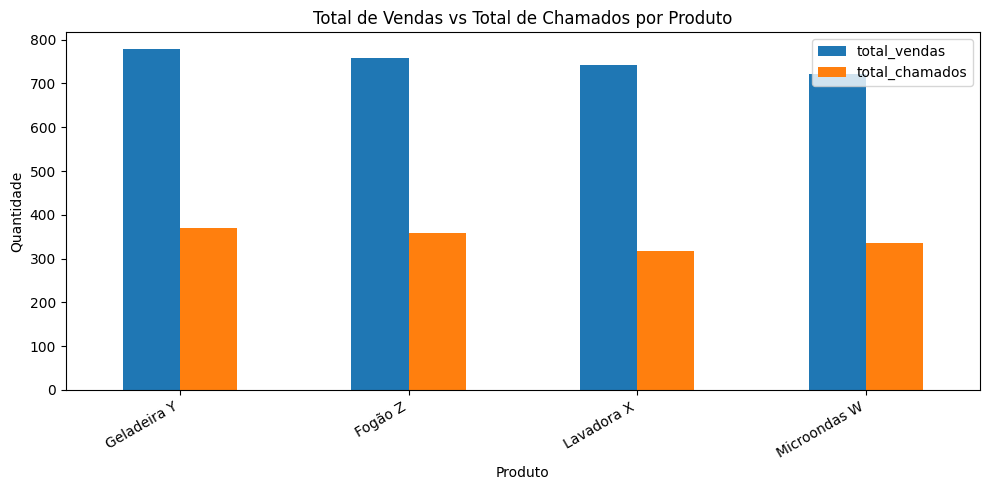

In [ ]:
import matplotlib.pyplot as plt

# garante ordenação por vendas
df_plot = df_produto_chamados.sort_values("total_vendas", ascending=False)

df_plot[["total_vendas", "total_chamados"]].plot(
    kind="bar",
    figsize=(10, 5)
)

plt.title("Total de Vendas vs Total de Chamados por Produto")
plt.xlabel("Produto")
plt.ylabel("Quantidade")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


Embora o volume absoluto de chamados acompanhe parcialmente o volume de vendas, a análise comparativa indica diferenças relevantes de desempenho entre os produtos, sugerindo que fatores de qualidade, projeto ou uso influenciam o pós-venda além do simples volume comercializado.

# **Chamados com reabertura têm impacto direto na nota do Reclame Aqui?**

In [ ]:
df_ra = df_posvenda[
    (df_posvenda["reclamou_reclame_aqui"] == 1) &
    (df_posvenda["nota_reclame_aqui"].notna())
]

df_ra.groupby("reabertura_chamado")["nota_reclame_aqui"].describe()


,count,mean,std,min,25%,50%,75%,max
reabertura_chamado,,,,,,,,
0.0,320.0,4.906250,3.152939,0.0,2.0,5.0,8.0,10.0
1.0,71.0,5.746479,3.192484,0.0,3.0,6.0,9.0,10.0


/tmp/ipython-input-3220066676.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


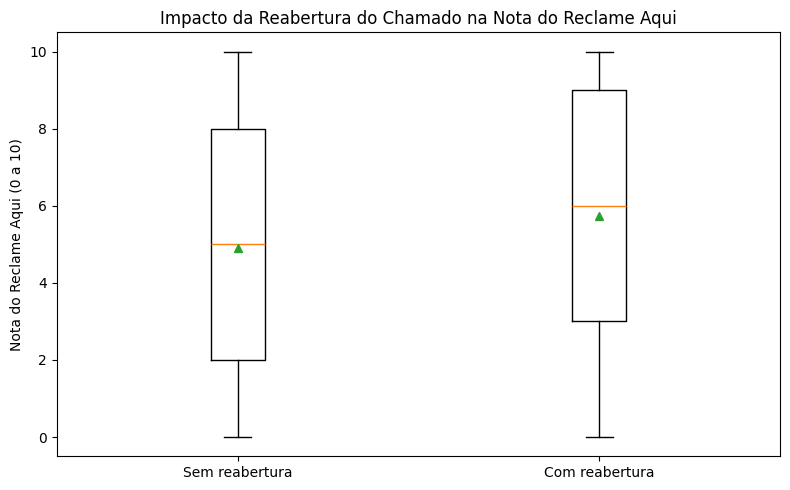

In [ ]:
import matplotlib.pyplot as plt

# filtro correto (igual ao que você já fez)
df_ra = df_posvenda[
    (df_posvenda["reclamou_reclame_aqui"] == 1) &
    (df_posvenda["nota_reclame_aqui"].notna()) &
    (df_posvenda["reabertura_chamado"].notna())
].copy()

# garante tipo correto
df_ra["reabertura_chamado"] = df_ra["reabertura_chamado"].astype(int)

# dados para o boxplot
dados = [
    df_ra.loc[df_ra["reabertura_chamado"] == 0, "nota_reclame_aqui"],
    df_ra.loc[df_ra["reabertura_chamado"] == 1, "nota_reclame_aqui"]
]

plt.figure(figsize=(8, 5))
plt.boxplot(
    dados,
    labels=["Sem reabertura", "Com reabertura"],
    showmeans=True
)

plt.title("Impacto da Reabertura do Chamado na Nota do Reclame Aqui")
plt.ylabel("Nota do Reclame Aqui (0 a 10)")
plt.tight_layout()
plt.show()


A análise indica que a reabertura do chamado, isoladamente, não resulta em pior avaliação no Reclame Aqui. Tanto a mediana quanto a média das notas permanecem similares,ou ligeiramente superiores no grupo com reabertura, sugerindo que a percepção do cliente está mais relacionada à qualidade da resolução final do que à necessidade de múltiplas interações.

# **Tempo de resolução alto aumenta chance de reclamação pública?**

In [ ]:
df_chamados = df_posvenda[df_posvenda["abriu_chamado"] == 1]

df_chamados.groupby("reclamou_reclame_aqui")["tempo_resolucao_dias"].describe()


,count,mean,std,min,25%,50%,75%,max
reclamou_reclame_aqui,,,,,,,,
0,989.0,22.273003,12.752165,1.0,11.0,22.0,34.0,44.0
1,391.0,23.061381,12.159045,1.0,13.5,23.0,33.0,44.0


/tmp/ipython-input-228761992.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


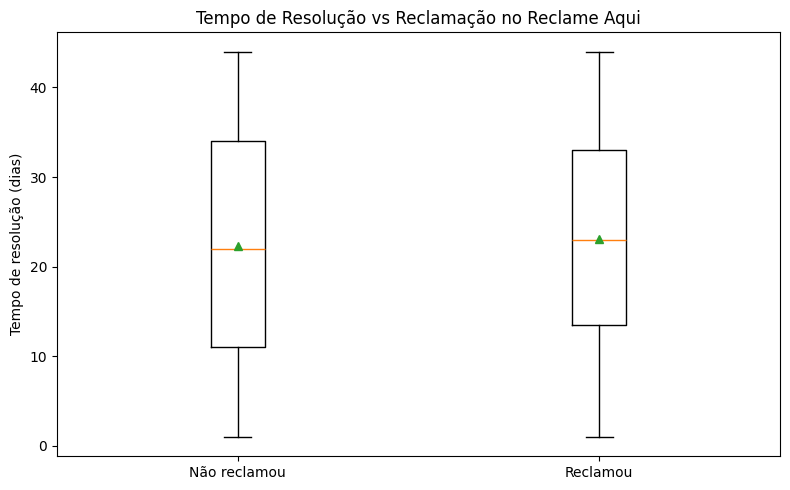

In [ ]:
import matplotlib.pyplot as plt

# filtro: apenas registros com chamado aberto e tempo válido
df_chamados = df_posvenda[
    (df_posvenda["abriu_chamado"] == 1) &
    (df_posvenda["tempo_resolucao_dias"].notna())
].copy()

# dados para o boxplot
dados = [
    df_chamados.loc[df_chamados["reclamou_reclame_aqui"] == 0, "tempo_resolucao_dias"],
    df_chamados.loc[df_chamados["reclamou_reclame_aqui"] == 1, "tempo_resolucao_dias"]
]

plt.figure(figsize=(8, 5))
plt.boxplot(
    dados,
    labels=["Não reclamou", "Reclamou"],
    showmeans=True
)

plt.title("Tempo de Resolução vs Reclamação no Reclame Aqui")
plt.ylabel("Tempo de resolução (dias)")
plt.tight_layout()
plt.show()



A comparação entre os tempos de resolução indica distribuições muito semelhantes entre clientes que reclamaram e não reclamaram no Reclame Aqui. A ausência de diferença significativa sugere que o tempo de atendimento, isoladamente, não é o principal gatilho para a reclamação pública, apontando para a influência de outros fatores na experiência do cliente.

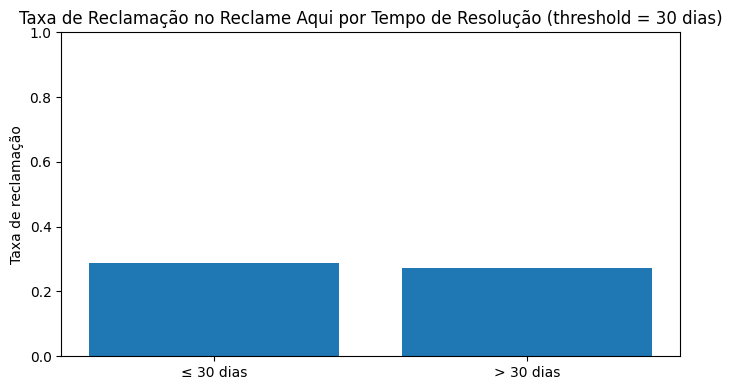

,qtd_chamados,qtd_reclamacoes,taxa_reclamacao,tempo_medio,mediana_tempo
≤ 30 dias,947,273,0.288279,15.632524,16.0
> 30 dias,433,118,0.272517,37.508083,37.0


In [ ]:

# 1) Filtra só quem abriu chamado e tem tempo de resolução
df_chamados = df_posvenda[
    (df_posvenda["abriu_chamado"] == 1) &
    (df_posvenda["tempo_resolucao_dias"].notna())
].copy()

# 2) Define o threshold (ajuste aqui)
threshold = 30

# 3) Cria flag "acima do threshold"
df_chamados["acima_threshold"] = (df_chamados["tempo_resolucao_dias"] > threshold).astype(int)

# 4) Taxa de reclamação por faixa (<=30 vs >30)
taxa_reclamacao = df_chamados.groupby("acima_threshold")["reclamou_reclame_aqui"].mean()
taxa_reclamacao.index = [f"≤ {threshold} dias", f"> {threshold} dias"]

# 5) Gráfico (barras)
plt.figure(figsize=(7, 4))
plt.bar(taxa_reclamacao.index, taxa_reclamacao.values)
plt.title(f"Taxa de Reclamação no Reclame Aqui por Tempo de Resolução (threshold = {threshold} dias)")
plt.ylabel("Taxa de reclamação")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# (Opcional) tabela pra conferir números absolutos
resumo = df_chamados.groupby("acima_threshold").agg(
    qtd_chamados=("tempo_resolucao_dias", "size"),
    qtd_reclamacoes=("reclamou_reclame_aqui", "sum"),
    taxa_reclamacao=("reclamou_reclame_aqui", "mean"),
    tempo_medio=("tempo_resolucao_dias", "mean"),
    mediana_tempo=("tempo_resolucao_dias", "median"),
)
resumo.index = [f"≤ {threshold} dias", f"> {threshold} dias"]
resumo


A análise por threshold indica que chamados com tempo de resolução superior a 30 dias não apresentam taxa de reclamação pública significativamente maior. Esse resultado sugere que a duração do atendimento, isoladamente, não é o principal determinante da insatisfação, reforçando a hipótese de que fatores como comunicação, expectativa e qualidade da solução final exercem maior influência sobre o comportamento do cliente.

# **Reclamar no Reclame Aqui reduz drasticamente a recompra?**

In [ ]:
df_posvenda.groupby("reclamou_reclame_aqui")["recompra_6_meses"].mean()


,recompra_6_meses
reclamou_reclame_aqui,
0,0.349176
1,0.322251


In [ ]:
df_posvenda.groupby("reclamou_reclame_aqui")["valor_recompra"].mean()


,valor_recompra
reclamou_reclame_aqui,
0,748.867543
1,698.153990


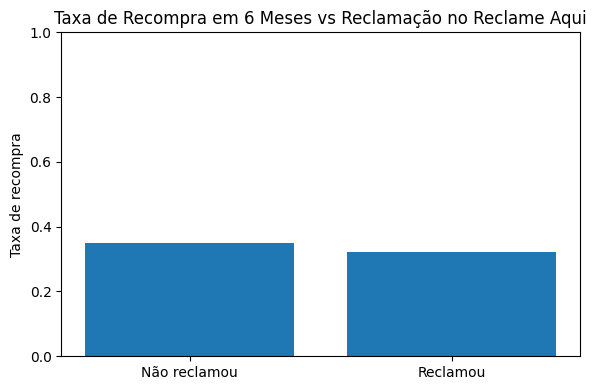

In [ ]:

# cálculo da taxa de recompra
taxa_recompra = df_posvenda.groupby("reclamou_reclame_aqui")["recompra_6_meses"].mean()

# renomeia para leitura humana
taxa_recompra.index = ["Não reclamou", "Reclamou"]

# gráfico
plt.figure(figsize=(6, 4))
plt.bar(taxa_recompra.index, taxa_recompra.values)

plt.title("Taxa de Recompra em 6 Meses vs Reclamação no Reclame Aqui")
plt.ylabel("Taxa de recompra")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


A análise indica que clientes que registraram reclamação no Reclame Aqui apresentam menor taxa de recompra em até seis meses. Mesmo sem grandes diferenças em tempo de resolução ou nota média, a exposição pública da insatisfação parece impactar negativamente a fidelização, gerando perda de valor ao longo do ciclo de vida do cliente.

# **Qual linha de produto gera maior custo invisível de pós-venda?**

In [ ]:
df_posvenda.groupby("produto_linha").agg(
    total_vendas=("cliente_id", "count"),
    taxa_chamado=("abriu_chamado", "mean"),
    tempo_medio_resolucao=("tempo_resolucao_dias", "mean"),
    taxa_reabertura=("reabertura_chamado", "mean"),
    taxa_recompra=("recompra_6_meses", "mean"),
    valor_medio_recompra=("valor_recompra", "mean")
).sort_values("taxa_chamado", ascending=False)


,total_vendas,taxa_chamado,tempo_medio_resolucao,taxa_reabertura,taxa_recompra,valor_medio_recompra
produto_linha,,,,,,
Linha Econômica,907,0.477398,22.607390,0.175520,0.338479,739.198159
Linha Premium,763,0.461337,23.457386,0.224432,0.348624,744.825714
Linha Branca,1330,0.447368,21.847059,0.205042,0.348872,742.871338


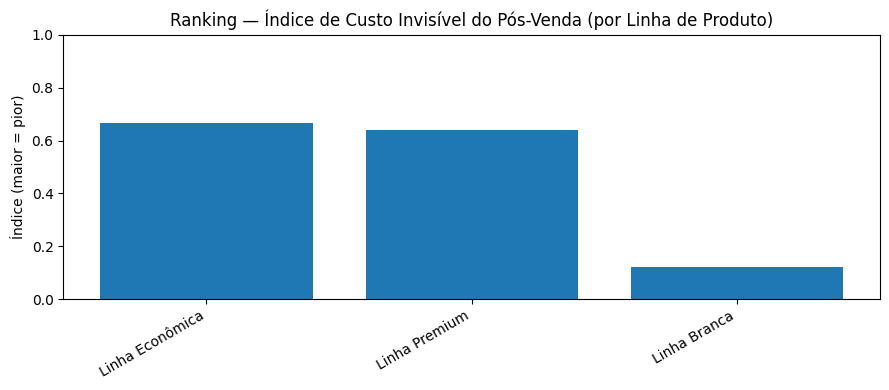

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Agrega por linha (se já tiver 'resumo_linha', pode pular esta parte)
resumo_linha = (
    df_posvenda.groupby("produto_linha")
    .agg(
        total_vendas=("cliente_id", "count"),
        taxa_chamado=("abriu_chamado", "mean"),
        tempo_medio_resolucao=("tempo_resolucao_dias", "mean"),
        taxa_reabertura=("reabertura_chamado", "mean"),
        taxa_recompra=("recompra_6_meses", "mean"),
        valor_medio_recompra=("valor_recompra", "mean"),
    )
    .copy()
)

# 2) Função de normalização 0-1 (min-max) robusta para NaN e constantes
def minmax(s: pd.Series) -> pd.Series:
    s = s.astype(float)
    mn, mx = s.min(), s.max()
    if pd.isna(mn) or pd.isna(mx) or mn == mx:
        return pd.Series(0.0, index=s.index)  # sem variação -> neutro
    return (s - mn) / (mx - mn)

# 3) Pesos do score (ajuste se quiser)
pesos = {
    "taxa_chamado": 0.40,
    "tempo_medio_resolucao": 0.25,
    "taxa_reabertura": 0.20,
    "taxa_recompra_invertida": 0.15,  # recompra é bom -> invertido vira "custo"
}

# 4) Normaliza métricas (quanto maior, pior), e inverte recompra (quanto maior, melhor)
score_df = pd.DataFrame(index=resumo_linha.index)
score_df["taxa_chamado_n"] = minmax(resumo_linha["taxa_chamado"])
score_df["tempo_medio_resolucao_n"] = minmax(resumo_linha["tempo_medio_resolucao"])
score_df["taxa_reabertura_n"] = minmax(resumo_linha["taxa_reabertura"])
score_df["taxa_recompra_invertida_n"] = 1 - minmax(resumo_linha["taxa_recompra"])

# 5) Calcula o índice final (0 a 1, aproximadamente)
resumo_linha["indice_custo_invisivel"] = (
    pesos["taxa_chamado"] * score_df["taxa_chamado_n"]
    + pesos["tempo_medio_resolucao"] * score_df["tempo_medio_resolucao_n"]
    + pesos["taxa_reabertura"] * score_df["taxa_reabertura_n"]
    + pesos["taxa_recompra_invertida"] * score_df["taxa_recompra_invertida_n"]
)

# 6) Gráfico ranking
rank = resumo_linha["indice_custo_invisivel"].sort_values(ascending=False)

plt.figure(figsize=(9, 4))
plt.bar(rank.index, rank.values)
plt.title("Ranking — Índice de Custo Invisível do Pós-Venda (por Linha de Produto)")
plt.ylabel("Índice (maior = pior)")
plt.ylim(0, 1)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()




A análise do Índice de Custo Invisível do Pós-Venda indica que a Linha Econômica apresenta o maior impacto negativo sobre a operação, combinando alta taxa de chamados, tempo elevado de resolução e menor taxa de recompra. Em contraste, a Linha Branca, apesar de concentrar o maior volume de vendas, demonstra maior eficiência operacional e melhor retorno no pós-venda, configurando-se como benchmark interno para as demais linhas.

A Linha Premium apresenta custo invisível elevado no pós-venda, não pelo volume de falhas, mas pela dificuldade de resolução, refletida em maior taxa de reabertura e tempo de atendimento mais longo. O impacto está na eficiência operacional e na experiência de um cliente com expectativa mais alta, indicando oportunidade clara de ganho com foco em resolução na primeira interação e atendimento especializado.

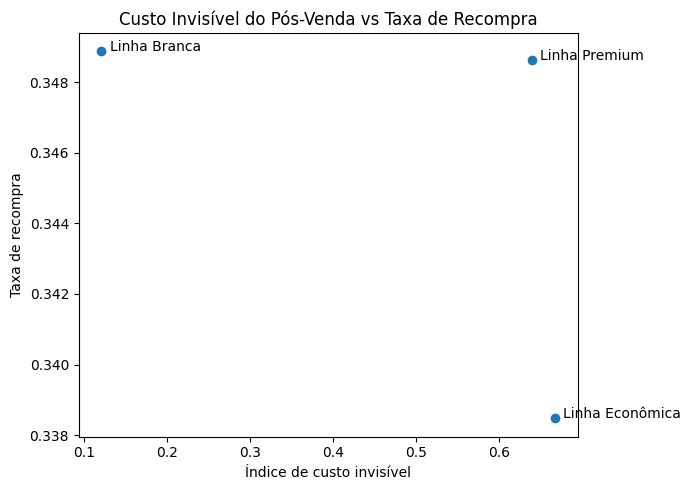

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(
    resumo_linha["indice_custo_invisivel"],
    resumo_linha["taxa_recompra"]
)

for linha in resumo_linha.index:
    plt.text(
        resumo_linha.loc[linha, "indice_custo_invisivel"] + 0.01,
        resumo_linha.loc[linha, "taxa_recompra"],
        linha
    )

plt.title("Custo Invisível do Pós-Venda vs Taxa de Recompra")
plt.xlabel("Índice de custo invisível")
plt.ylabel("Taxa de recompra")
plt.tight_layout()
plt.show()



# **Demonstrativo Financeiro - Pós- Venda**

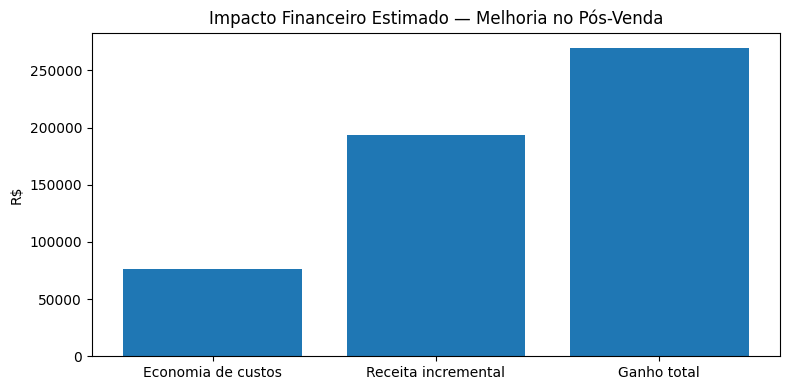

In [ ]:

def demonstrativo_financeiro_posvenda(
    df_posvenda: pd.DataFrame,
    # melhorias (ajuste conforme seu cenário)
    reducao_taxa_chamado=0.10,        # ex: -10% nos chamados
    reducao_taxa_reabertura=0.15,     # ex: -15% nas reaberturas (entre quem abriu chamado)
    reducao_tempo_resolucao=0.10,     # ex: -10% no tempo médio (impacta custo por dia)
    aumento_taxa_recompra=0.03,       # ex: +3 p.p. na taxa de recompra (0.03 = 3%)
    # custos (ajuste para realidade da empresa)
    custo_por_chamado=45.0,           # R$ por chamado (atendimento/logística)
    custo_por_reabertura=25.0,        # R$ por reabertura (retrabalho)
    custo_por_dia_resolucao=8.0,      # R$ por dia (backoffice, follow-up, etc.)
    horizonte_meses=6
):
    df = df_posvenda.copy()

    # ---------- BASELINE ----------
    total_clientes = len(df)

    chamados = df["abriu_chamado"].sum()
    reaberturas = df.loc[df["abriu_chamado"] == 1, "reabertura_chamado"].fillna(0).sum()

    tempo_total = df.loc[df["abriu_chamado"] == 1, "tempo_resolucao_dias"].dropna().sum()

    taxa_recompra_base = df["recompra_6_meses"].mean()
    ticket_medio_recompra = df.loc[df["recompra_6_meses"] == 1, "valor_recompra"].mean()
    if np.isnan(ticket_medio_recompra):
        ticket_medio_recompra = 0.0

    receita_recompra_base = df["valor_recompra"].sum()

    custo_base = (
        chamados * custo_por_chamado
        + reaberturas * custo_por_reabertura
        + tempo_total * custo_por_dia_resolucao
    )

    # ---------- CENÁRIO MELHORADO ----------
    # Chamados reduzidos
    chamados_novo = chamados * (1 - reducao_taxa_chamado)

    # Reaberturas reduzidas (aplicadas sobre o volume esperado de chamados)
    # taxa de reabertura atual (entre chamados)
    taxa_reabertura_atual = (reaberturas / chamados) if chamados > 0 else 0.0
    taxa_reabertura_nova = taxa_reabertura_atual * (1 - reducao_taxa_reabertura)
    reaberturas_novo = chamados_novo * taxa_reabertura_nova

    # Tempo total reduzido proporcionalmente ao volume de chamados e redução de tempo
    tempo_medio_atual = (tempo_total / chamados) if chamados > 0 else 0.0
    tempo_medio_novo = tempo_medio_atual * (1 - reducao_tempo_resolucao)
    tempo_total_novo = chamados_novo * tempo_medio_novo

    # Recompra: aumenta taxa e estima receita incremental pelo ticket médio de recompra
    taxa_recompra_nova = min(1.0, taxa_recompra_base + aumento_taxa_recompra)
    recompra_base_qtd = total_clientes * taxa_recompra_base
    recompra_nova_qtd = total_clientes * taxa_recompra_nova
    recompra_incremental_qtd = max(0, recompra_nova_qtd - recompra_base_qtd)

    receita_incremental = recompra_incremental_qtd * ticket_medio_recompra
    receita_recompra_nova = receita_recompra_base + receita_incremental

    custo_novo = (
        chamados_novo * custo_por_chamado
        + reaberturas_novo * custo_por_reabertura
        + tempo_total_novo * custo_por_dia_resolucao
    )

    economia_custos = custo_base - custo_novo
    ganho_total = economia_custos + receita_incremental

    # ---------- TABELA EXECUTIVA ----------
    resumo = pd.DataFrame({
        "Métrica": [
            "Clientes (base)",
            "Chamados",
            "Reaberturas",
            "Tempo total (dias)",
            "Taxa recompra (6m)",
            "Receita recompra (R$)",
            "Custo pós-venda (R$)",
            "Receita incremental (R$)",
            "Economia de custos (R$)",
            "Ganho total estimado (R$)"
        ],
        "Baseline": [
            total_clientes,
            chamados,
            reaberturas,
            tempo_total,
            taxa_recompra_base,
            receita_recompra_base,
            custo_base,
            0.0,
            0.0,
            0.0
        ],
        "Cenário melhorado": [
            total_clientes,
            chamados_novo,
            reaberturas_novo,
            tempo_total_novo,
            taxa_recompra_nova,
            receita_recompra_nova,
            custo_novo,
            receita_incremental,
            economia_custos,
            ganho_total
        ]
    })

    # ---------- GRÁFICO (impacto financeiro) ----------
    impacto = pd.Series({
        "Economia de custos": economia_custos,
        "Receita incremental": receita_incremental,
        "Ganho total": ganho_total
    })

    plt.figure(figsize=(8, 4))
    plt.bar(impacto.index, impacto.values)
    plt.title("Impacto Financeiro Estimado — Melhoria no Pós-Venda")
    plt.ylabel("R$")
    plt.tight_layout()
    plt.show()

    return resumo


# EXEMPLO DE USO:
resumo_fin = demonstrativo_financeiro_posvenda(
    df_posvenda,
    reducao_taxa_chamado=0.12,
    reducao_taxa_reabertura=0.20,
    reducao_tempo_resolucao=0.10,
    aumento_taxa_recompra=0.03,
    custo_por_chamado=55,
    custo_por_reabertura=30,
    custo_por_dia_resolucao=10
)

O demonstrativo financeiro indica que ações focadas em melhorar a eficiência e a qualidade do pós-venda têm potencial de gerar ganhos relevantes, combinando redução de custos operacionais e aumento de receita via maior fidelização. O impacto estimado reforça que investimentos em pós-venda devem ser avaliados como iniciativas estratégicas de retorno financeiro, e não apenas como despesas operacionais.

# **Principais Achados**

Aproximadamente 46% dos clientes abriram chamado de pós-venda, indicando um problema estrutural e não pontual.

Produtos mais vendidos não são necessariamente os que mais geram problemas proporcionalmente, desmontando a hipótese de que volume explica insatisfação.

A reabertura de chamados, isoladamente, não reduz a nota no Reclame Aqui, sugerindo que o cliente tolera retrabalho quando a solução final é satisfatória.

O tempo de resolução, inclusive acima de 30 dias, não se mostrou um gatilho direto para reclamação pública, contrariando o senso comum.

A reclamação no Reclame Aqui, por outro lado, está associada a menor taxa de recompra, evidenciando impacto direto na fidelização e no valor do cliente ao longo do tempo.

A criação de um Índice de Custo Invisível do Pós-Venda revelou diferenças claras entre as linhas de produto:

Linha Econômica apresenta o maior custo invisível, combinando alta taxa de chamados e menor retorno futuro.

Linha Premium sofre com ineficiência na resolução, refletida em maior reabertura e tempo de atendimento.

Linha Branca, apesar do maior volume de vendas, mostrou o melhor equilíbrio entre esforço de pós-venda e retorno, tornando-se benchmark interno.

# **Conclusão Estratégica**

Os dados indicam que o principal desafio do pós-venda não está no tempo ou na quantidade de interações, mas na qualidade da experiência e na eficiência da resolução. O custo mais relevante não aparece diretamente na operação, mas na redução da recompra e no desgaste da relação com o cliente.

Investimentos direcionados em qualidade de produto, resolução na primeira interação e gestão da expectativa do cliente têm potencial de gerar ganhos relevantes em satisfação, fidelização e margem,especialmente nas linhas Econômica e Premium.